<a href="https://colab.research.google.com/github/Silva-TI/MachineLearning-Silva/blob/main/Latihan_6_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df = df.rename(columns={
    'age': 'Usia',
    'sex': 'Jenis_Kelamin',
    'cp': 'Tipe_Nyeri_Dada',
    'trestbps': 'Tekanan_Darah_Istirahat',
    'chol': 'Kolesterol',
    'fbs': 'Gula_Darah_Puasa',
    'thalach': 'Detak_Jantung_Max',
    'exang': 'Angina_Akibat_Latihan',
    'oldpeak': 'Depresi_ST_Latihan',
    'ca': 'Pembuluh_Utama_Berwarna',
    'thal': 'Thalassaemia',
    'target': 'Penyakit_Jantung'
})


df.head()

,Usia,Jenis_Kelamin,Tipe_Nyeri_Dada,Tekanan_Darah_Istirahat,Kolesterol,Gula_Darah_Puasa,restecg,Detak_Jantung_Max,Angina_Akibat_Latihan,Depresi_ST_Latihan,slope,Pembuluh_Utama_Berwarna,Thalassaemia,Penyakit_Jantung
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
y = df['Penyakit_Jantung']
X = df.drop('Penyakit_Jantung', axis=1)

In [6]:
y.head()

,Penyakit_Jantung
0,1
1,1
2,1
3,1
4,1


In [7]:
X.head()

,Usia,Jenis_Kelamin,Tipe_Nyeri_Dada,Tekanan_Darah_Istirahat,Kolesterol,Gula_Darah_Puasa,restecg,Detak_Jantung_Max,Angina_Akibat_Latihan,Depresi_ST_Latihan,slope,Pembuluh_Utama_Berwarna,Thalassaemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


# **LINEAR**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
y_pred = model.predict(X_test)

print(f"Akurasi : {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nLaporan Klasifikasi:", classification_report(y_test, y_pred))

Akurasi : 86.89%

Laporan Klasifikasi:               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61




Confusion Matrix:
 [[25  4]
 [ 4 28]]


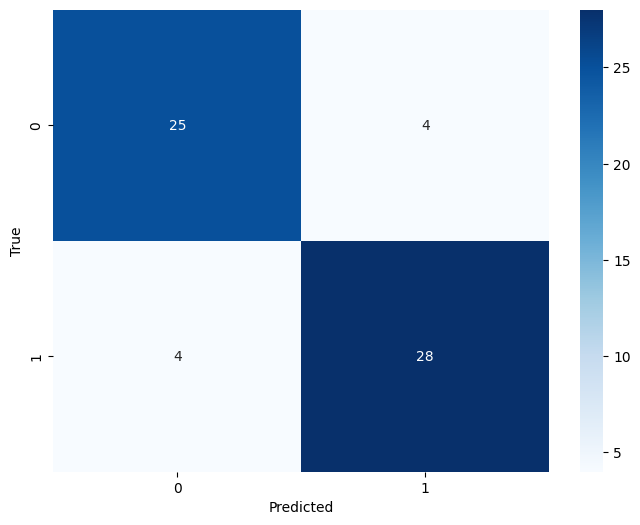

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

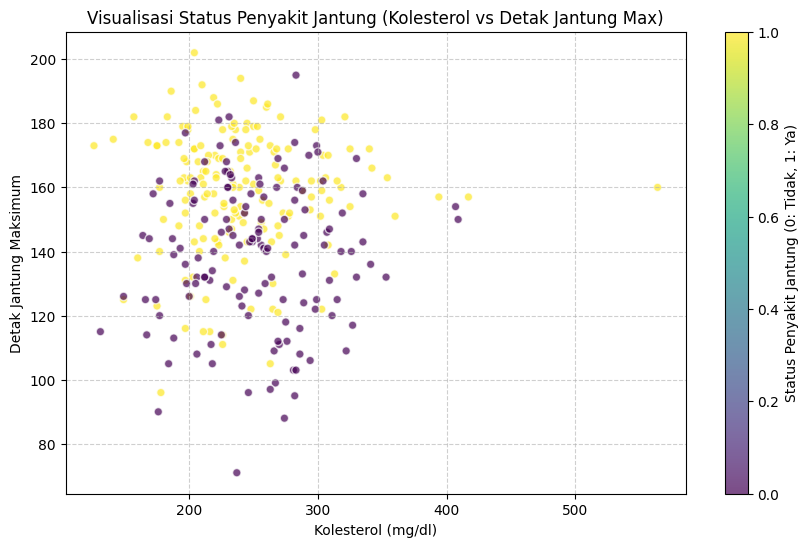

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    df['Kolesterol'],
    df['Detak_Jantung_Max'],
    c=df['Penyakit_Jantung'], # Target biner (0/1) langsung digunakan sebagai warna
    cmap='viridis',           # Peta warna
    alpha=0.7,                # Transparansi
    edgecolors='w'            # Garis tepi putih
)

# Menambahkan label dan judul
plt.xlabel('Kolesterol (mg/dl)')
plt.ylabel('Detak Jantung Maksimum')
plt.title('Visualisasi Status Penyakit Jantung (Kolesterol vs Detak Jantung Max)')

# Menambahkan Color Bar dan Keterangan
cbar = plt.colorbar()
cbar.set_label('Status Penyakit Jantung (0: Tidak, 1: Ya)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

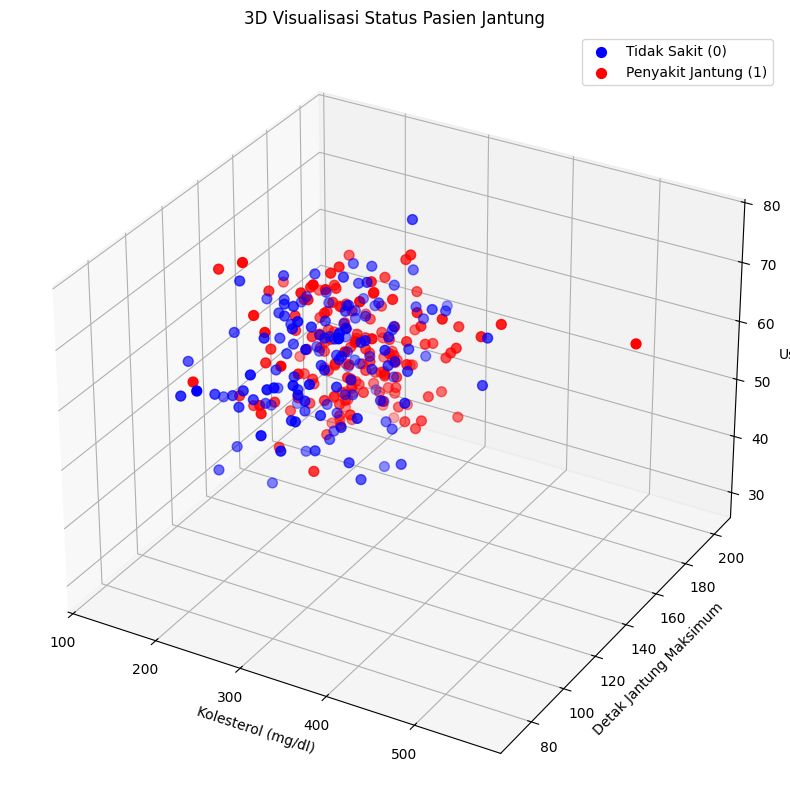

In [12]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Warna dan Label yang sesuai untuk target BINER (0 dan 1)
colors = ['blue', 'red'] # Biru untuk 0 (Tidak Sakit), Merah untuk 1 (Sakit)
labels = ['Tidak Sakit (0)', 'Penyakit Jantung (1)']

# 3. Looping untuk Plot Data
for i, status in enumerate([0, 1]):
    # Membuat subset data untuk setiap status penyakit
    subset = df[df['Penyakit_Jantung'] == status]

    # Membuat scatter plot 3D
    ax.scatter(subset['Kolesterol'],
               subset['Detak_Jantung_Max'],
               subset['Usia'],
               c=colors[i],
               label=labels[i],
               s=50)

# 4. Menambahkan Label dan Judul
ax.set_xlabel('Kolesterol (mg/dl)')
ax.set_ylabel('Detak Jantung Maksimum')
ax.set_zlabel('Usia')
ax.set_title('3D Visualisasi Status Pasien Jantung')
ax.legend()

plt.show()

# **POLINOMIAL**

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel = 'poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

In [14]:
y_pred = model.predict(X_test)

print(f"Akurasi : {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nLaporan Klasifikasi:", classification_report(y_test, y_pred))

Akurasi : 77.05%

Laporan Klasifikasi:               precision    recall  f1-score   support

           0       0.80      0.69      0.74        29
           1       0.75      0.84      0.79        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61




Confusion Matrix:
 [[20  9]
 [ 5 27]]


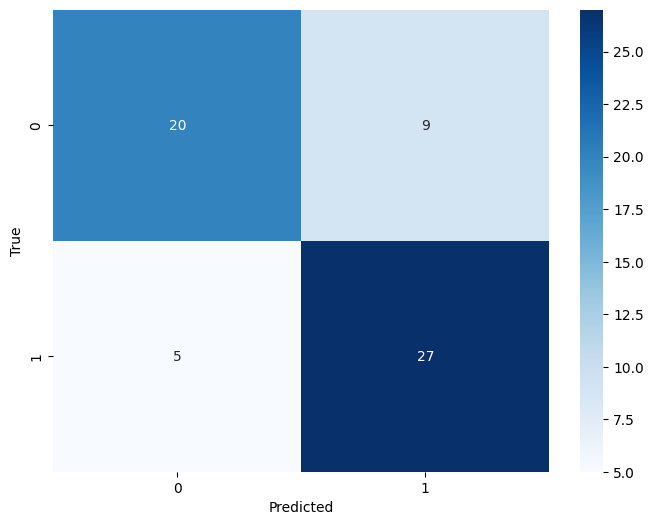

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

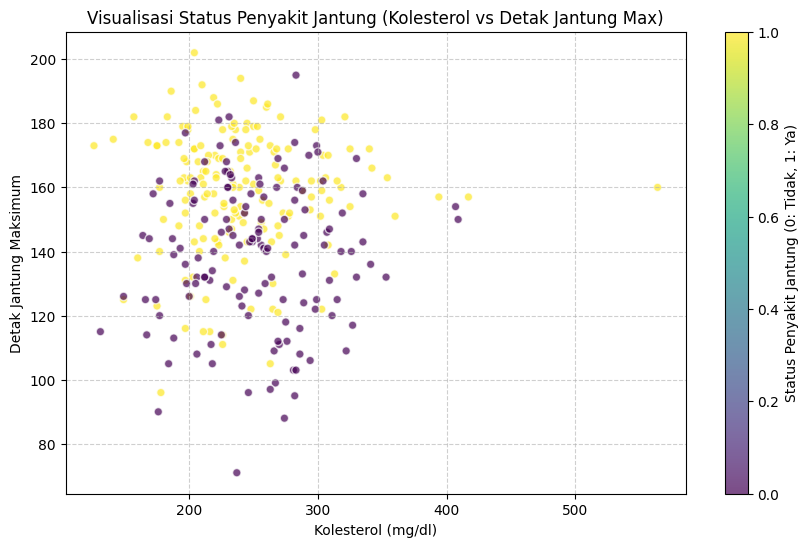

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    df['Kolesterol'],
    df['Detak_Jantung_Max'],
    c=df['Penyakit_Jantung'], # Target biner (0/1) langsung digunakan sebagai warna
    cmap='viridis',           # Peta warna
    alpha=0.7,                # Transparansi
    edgecolors='w'            # Garis tepi putih
)

# Menambahkan label dan judul
plt.xlabel('Kolesterol (mg/dl)')
plt.ylabel('Detak Jantung Maksimum')
plt.title('Visualisasi Status Penyakit Jantung (Kolesterol vs Detak Jantung Max)')

# Menambahkan Color Bar dan Keterangan
cbar = plt.colorbar()
cbar.set_label('Status Penyakit Jantung (0: Tidak, 1: Ya)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

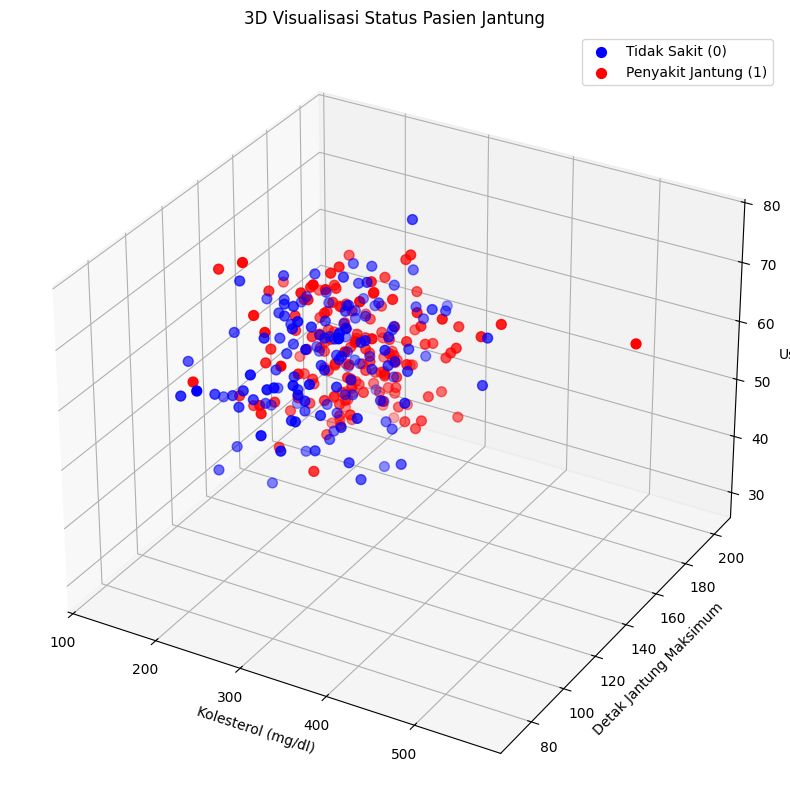

In [17]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Warna dan Label yang sesuai untuk target BINER (0 dan 1)
colors = ['blue', 'red'] # Biru untuk 0 (Tidak Sakit), Merah untuk 1 (Sakit)
labels = ['Tidak Sakit (0)', 'Penyakit Jantung (1)']

# 3. Looping untuk Plot Data
for i, status in enumerate([0, 1]):
    # Membuat subset data untuk setiap status penyakit
    subset = df[df['Penyakit_Jantung'] == status]

    # Membuat scatter plot 3D
    ax.scatter(subset['Kolesterol'],
               subset['Detak_Jantung_Max'],
               subset['Usia'],
               c=colors[i],
               label=labels[i],
               s=50)

# 4. Menambahkan Label dan Judul
ax.set_xlabel('Kolesterol (mg/dl)')
ax.set_ylabel('Detak Jantung Maksimum')
ax.set_zlabel('Usia')
ax.set_title('3D Visualisasi Status Pasien Jantung')
ax.legend()

plt.show()

# **GAUSSIAN**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC()

In [19]:
y_pred = model.predict(X_test)

print(f"Akurasi : {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nLaporan Klasifikasi:", classification_report(y_test, y_pred))

Akurasi : 70.49%

Laporan Klasifikasi:               precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



# **SIGMOID**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel = 'sigmoid')
model.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [21]:
y_pred = model.predict(X_test)

print(f"Akurasi : {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nLaporan Klasifikasi:", classification_report(y_test, y_pred))

Akurasi : 52.46%

Laporan Klasifikasi:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.52      1.00      0.69        32

    accuracy                           0.52        61
   macro avg       0.26      0.50      0.34        61
weighted avg       0.28      0.52      0.36        61



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
